<a href="https://colab.research.google.com/github/alihaider-ml/Pyspark/blob/main/PySpark_Lab_11_A_Case_Study_Mobile_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Java for PySpark**

In [1]:
!apt-get install openjdk-11-jdk -y
!pip install pyspark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core ca-certificates-java fonts-dejavu-core fonts-dejavu-extra
  gsettings-desktop-schemas java-common libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libpcsclite1 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
  session-migration x11-utils
Suggested packages:
  default-jre pcscd libxt-doc openjdk-11-demo openjdk-11-source visualvm
  libnss-mdns fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java fonts-dejavu-core fonts-dejavu-extra
  gsettings-desktop-schemas java-common libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")


## **Import Library**

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

## **Start Spark Session**

In [4]:
spark = SparkSession.builder.appName("Case Study").getOrCreate()

## **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Load Dataset**

In [6]:
df = spark.read.csv("/content/Mobile Reviews Sentiment.csv", header=True, inferSchema=True)


In [7]:
df.show(5, truncate=False)

+---------+-----------------+---+--------+-------------+---------+--------------------------------------------------------------------------+---------+-------+----------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+----------+
|review_id|customer_name    |age|brand   |model        |price_usd|review_text                                                               |sentiment|country|language  |review_date|battery_life_rating|camera_rating|performance_rating|design_rating|display_rating|review_length|word_count|helpful_votes|source    |
+---------+-----------------+---+--------+-------------+---------+--------------------------------------------------------------------------+---------+-------+----------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+----------+
|1        |Aryan Maharaj    |45 |Realme  |Realme 12 Pro

## **Explore and Process Data**

### **Print Schema**

In [8]:
df.printSchema()

root
 |-- review_id: integer (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- price_usd: double (nullable = true)
 |-- review_text: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- country: string (nullable = true)
 |-- language: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- battery_life_rating: integer (nullable = true)
 |-- camera_rating: integer (nullable = true)
 |-- performance_rating: integer (nullable = true)
 |-- design_rating: integer (nullable = true)
 |-- display_rating: integer (nullable = true)
 |-- review_length: integer (nullable = true)
 |-- word_count: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- source: string (nullable = true)



### **Statistical Summary**

In [9]:
df.describe().show()

+-------+-----------------+-------------+-----------------+------+---------+------------------+--------------------+---------+---------+----------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+----------------+----------+
|summary|        review_id|customer_name|              age| brand|    model|         price_usd|         review_text|sentiment|  country|  language|battery_life_rating|     camera_rating|performance_rating|     design_rating|    display_rating|    review_length|        word_count|   helpful_votes|    source|
+-------+-----------------+-------------+-----------------+------+---------+------------------+--------------------+---------+---------+----------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+----------------+----------+
|  count|            50000|        50000|            50000| 50000|    500

### **Total Rows**

In [10]:
df.count()

50000

### **Missing Values**

In [11]:
from pyspark.sql.functions import col, count, when

# Count missing values per column
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---------+-------------+---+-----+-----+---------+-----------+---------+-------+--------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+------+
|review_id|customer_name|age|brand|model|price_usd|review_text|sentiment|country|language|review_date|battery_life_rating|camera_rating|performance_rating|design_rating|display_rating|review_length|word_count|helpful_votes|source|
+---------+-------------+---+-----+-----+---------+-----------+---------+-------+--------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+------+
|        0|            0|  0|    0|    0|        0|          0|        0|      0|       0|          0|                  0|            0|                 0|            0|             0|            0|         0|            0|     0|
+---------+-------------+---+-----+-----+---------+-----------+---------+---

### **Duplicate**

In [12]:
df.count()  - df.distinct().count()

0

In [13]:
df.count() - df.dropDuplicates().count()

0

In [14]:
df.groupby(df.columns).count().filter("count > 1").show()

+---------+-------------+---+-----+-----+---------+-----------+---------+-------+--------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+------+-----+
|review_id|customer_name|age|brand|model|price_usd|review_text|sentiment|country|language|review_date|battery_life_rating|camera_rating|performance_rating|design_rating|display_rating|review_length|word_count|helpful_votes|source|count|
+---------+-------------+---+-----+-----+---------+-----------+---------+-------+--------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+------+-----+
+---------+-------------+---+-----+-----+---------+-----------+---------+-------+--------+-----------+-------------------+-------------+------------------+-------------+--------------+-------------+----------+-------------+------+-----+



### **Data Types**

In [15]:
df.printSchema()

root
 |-- review_id: integer (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- price_usd: double (nullable = true)
 |-- review_text: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- country: string (nullable = true)
 |-- language: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- battery_life_rating: integer (nullable = true)
 |-- camera_rating: integer (nullable = true)
 |-- performance_rating: integer (nullable = true)
 |-- design_rating: integer (nullable = true)
 |-- display_rating: integer (nullable = true)
 |-- review_length: integer (nullable = true)
 |-- word_count: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- source: string (nullable = true)



### **Text Processing**

- Trim
- Lowercase
- Remove special characters

In [16]:
df_clean = df.withColumn("customer_name", trim(col("customer_name"))) \
             .withColumn("review_text", lower(trim(col("review_text")))) \
             .withColumn("customer_name", regexp_replace("customer_name", "[^a-zA-Z\\s]", "")) \
             .withColumn("review_text", regexp_replace("review_text", "[^a-zA-Z\\s]", ""))

df_clean.select("customer_name","review_text").show(truncate=False)

+------------------+-----------------------------------------------------------------------+
|customer_name     |review_text                                                            |
+------------------+-----------------------------------------------------------------------+
|Aryan Maharaj     |not worth the money spent wouldnt recommend                            |
|Davi Miguel Sousa |absolutely love this phone the camera is next level absolutely worth it|
|Pahal Balay       |loving the clean ui and fast updates loving it so far                  |
|David Guzman      |build quality feels solid and durable no regrets buying this one       |
|Yago Leo          |not bad for daily use but could be optimized average experience overall|
|Lara Abreu        |battery easily lasts a day with heavy use no regrets buying this one   |
|Gina Moore        |loving the clean ui and fast updates absolutely worth it               |
|James Howard      |phone hangs often regret buying it wouldnt recomme

### **Add a new column: Average Rating**

In [17]:
df = df.withColumn("Avg_Rating", \
          (col("battery_life_rating") + col("camera_rating") \
            + col("performance_rating") + col("design_rating") + col("display_rating")) / 5)

In [18]:
df.select("review_id","battery_life_rating","camera_rating","performance_rating","design_rating","display_rating","Avg_Rating").show(5)

+---------+-------------------+-------------+------------------+-------------+--------------+----------+
|review_id|battery_life_rating|camera_rating|performance_rating|design_rating|display_rating|Avg_Rating|
+---------+-------------------+-------------+------------------+-------------+--------------+----------+
|        1|                  1|            1|                 3|            2|             1|       1.6|
|        2|                  3|            2|                 4|            3|             2|       2.8|
|        3|                  3|            5|                 3|            2|             4|       3.4|
|        4|                  1|            3|                 2|            1|             2|       1.8|
|        5|                  3|            3|                 2|            2|             1|       2.2|
+---------+-------------------+-------------+------------------+-------------+--------------+----------+
only showing top 5 rows



## **Basic Analysis**


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
# Register DataFrame as a Spark SQL table
df.createOrReplaceTempView("Reviews")

#### **How many reviews per sentiment?**




In [21]:
#df.groupBy("sentiment").agg(count("*").alias("count")).orderBy(col("count").desc()).show()

spark.sql("""
select sentiment, count(*) as total_reviews
from Reviews
group by 1""").show()

+---------+-------------+
|sentiment|total_reviews|
+---------+-------------+
| Positive|        27540|
|  Neutral|        12549|
| Negative|         9911|
+---------+-------------+



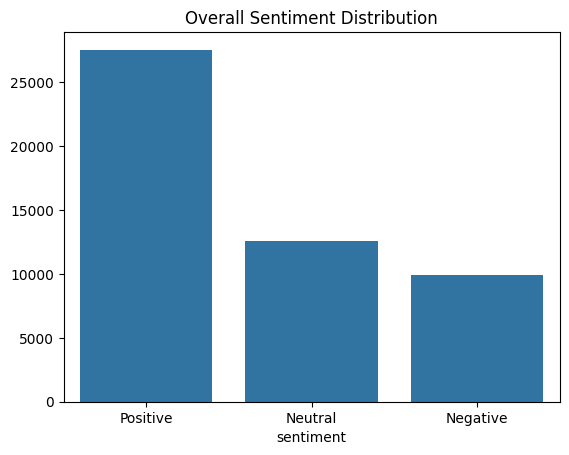

In [25]:
sentiment_distribution = spark.sql("""
select sentiment, count(*) as total_reviews
from Reviews
group by 1""").toPandas() #topandas will convert the value into pandas data frame

sns.barplot(sentiment_distribution, x="sentiment",y="total_reviews")
plt.title("Overall Sentiment Distribution")
plt.ylabel("")
plt.show()

#its static means hover does not work

In [26]:
# it dynamic means hover has works here, means its more interactive
px.bar(sentiment_distribution, x="total_reviews", y="sentiment", title="Overall Sentiment Distribution")

In [27]:
px.pie(sentiment_distribution, values="total_reviews", names="sentiment", title="Overall Sentiment Distribution")

#### **Sentiment Distribution by Brand**

In [28]:
sentiment_distribution = spark.sql("""
select brand, sentiment, count(*) as total_reviews
from Reviews
group by 1,2 """).toPandas()

sentiment_distribution.head(5)

,brand,sentiment,total_reviews
0,OnePlus,Positive,3959
1,Realme,Neutral,1745
2,Realme,Negative,1414
3,Samsung,Negative,1402
4,Google,Negative,1383


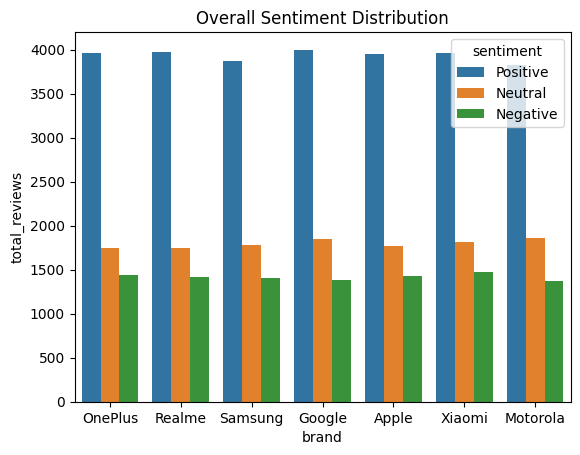

In [29]:
sns.barplot(sentiment_distribution, x="brand",y="total_reviews",hue="sentiment")
plt.title("Overall Sentiment Distribution")
plt.show()

In [30]:
custom_colors = {
    "Positive": "#2ca02c",   # Green
    "Negative": "#d62728",    # Red
    "Neutral": "#1f77b4",   # Blue
}

px.bar(sentiment_distribution, x="brand", y="total_reviews",
       color="sentiment", color_discrete_map=custom_colors, barmode='group', title="Overall Sentiment Distribution by Brand")

#### **Average rating per brand**


In [31]:
spark.sql(
"""
select brand, round(avg(avg_rating),2) as avg_rating
from Reviews
group by brand
order by avg_rating desc
"""
).show()


+--------+----------+
|   brand|avg_rating|
+--------+----------+
|  Realme|      2.74|
|   Apple|      2.73|
|  Google|      2.72|
| OnePlus|      2.72|
|Motorola|      2.71|
|  Xiaomi|      2.71|
| Samsung|       2.7|
+--------+----------+



In [32]:
avg_rating = spark.sql(
"""
select brand, round(avg(avg_rating),2) as avg_rating
from Reviews
group by brand
order by avg_rating desc
"""
).toPandas()


In [33]:
px.bar(avg_rating, x="brand", y="avg_rating", title="Average Rating by Brand")

#### **Find brand with highest rating**

In [34]:
max_value = avg_rating["avg_rating"].max()

avg_rating["color"] = avg_rating["avg_rating"].apply(
    lambda x: "crimson" if x == max_value else "lightblue"
)
avg_rating


,brand,avg_rating,color
0,Realme,2.74,crimson
1,Apple,2.73,lightblue
2,Google,2.72,lightblue
3,OnePlus,2.72,lightblue
4,Motorola,2.71,lightblue
5,Xiaomi,2.71,lightblue
6,Samsung,2.70,lightblue


In [35]:
fig = px.bar(
    avg_rating,
    x="brand",
    y="avg_rating",
    color="color",
    title="Average Rating by Brand",
    color_discrete_map="identity"  # Use the color values directly
)

#fig.update_traces(text=avg_rating["avg_rating"], textposition="outside")

fig.show()

#### **Country-wise count of Reviews**

In [36]:
country_distribution = spark.sql("""
select country, sentiment, count(*) as total_reviews
from Reviews
group by 1,2""").toPandas()


In [37]:
country_distribution

,country,sentiment,total_reviews
0,Canada,Neutral,1514
1,UK,Positive,3474
2,Canada,Positive,3418
3,Canada,Negative,1238
4,Australia,Negative,1221
5,Germany,Neutral,1538
6,Australia,Positive,3441
7,UAE,Positive,3489
8,UAE,Neutral,1580
9,Germany,Negative,1265


In [38]:
custom_colors = {
    "Positive": "#2ca02c",   # Green
    "Negative": "#d62728",    # Red
    "Neutral": "#1f77b4",   # Blue
}


fig = px.bar(country_distribution, x="country", y="total_reviews",
       color="sentiment", color_discrete_map=custom_colors,
       barmode='group', title="Country-wise count of Reviews by Brand")


fig.show()

In [39]:

fig = px.choropleth(country_distribution,
                    locations='country',
                    locationmode='country names',
                    color='total_reviews',
                    title='🌍 Country-wise Review Count')
fig.show()

In [40]:
fig = px.scatter_geo(
    country_distribution,
    locations="country",
    locationmode="country names",
    size="total_reviews",
    color="total_reviews",
    projection="natural earth",
    title="Sentiment Score Distribution by Country"
)

fig.show()
